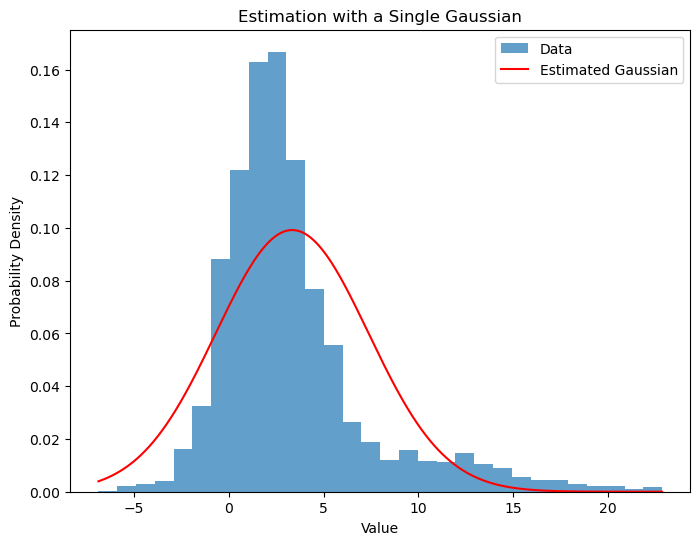

Iteration 1, Log-Likelihood: -6756.220287275213
Iteration 2, Log-Likelihood: -6608.565773070812
Iteration 3, Log-Likelihood: -6545.260716030143
Iteration 4, Log-Likelihood: -6510.413540360081
Iteration 5, Log-Likelihood: -6487.698104751216
Iteration 6, Log-Likelihood: -6471.070196338072
Iteration 7, Log-Likelihood: -6458.255868116137
Iteration 8, Log-Likelihood: -6448.281571891492
Iteration 9, Log-Likelihood: -6440.573380443874
Iteration 10, Log-Likelihood: -6434.685256298717
Iteration 11, Log-Likelihood: -6430.236407443105
Iteration 12, Log-Likelihood: -6426.90349008449
Iteration 13, Log-Likelihood: -6424.420630863595
Iteration 14, Log-Likelihood: -6422.5763777254
Iteration 15, Log-Likelihood: -6421.207183055681
Iteration 16, Log-Likelihood: -6420.18922745007
Iteration 17, Log-Likelihood: -6419.430200238065
Iteration 18, Log-Likelihood: -6418.8619827890525
Iteration 19, Log-Likelihood: -6418.43460987367
Iteration 20, Log-Likelihood: -6418.111528285808
Iteration 21, Log-Likelihood: -64

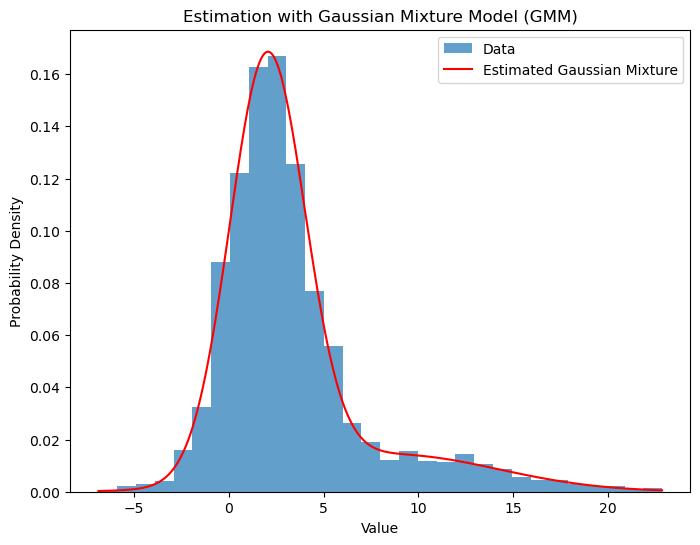

In [1]:
import numpy as np
import matplotlib.pyplot as plt

random_seed = 36784765
np.random.seed(random_seed)

Mean1 = 9.0 
Standard_dev1 = 5.0  
Mean2 = 2.0 
Standard_dev2 = 2.0 

y1 = np.random.normal(Mean1, Standard_dev1, 500)
y2 = np.random.normal(Mean2, Standard_dev2, 2000)
data = np.append(y1, y2)

# Part 1: 

class Gaussian:
    "Model univariate Gaussian"

    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma

  
    def pdf(self, datum):
        "Probability of a data point given the current parameters"
        
        return (1.0 / (self.sigma * np.sqrt(2 * np.pi))) * np.exp(-((datum - self.mu) ** 2) / (2 * self.sigma ** 2))


# Create an instance of the Gaussian class 
data_mean = np.mean(data)
data_std = np.std(data)
gaussian_estimate = Gaussian(data_mean, data_std)

# Generate data points to plot the estimated Gaussian distribution
x = np.linspace(min(data), max(data), 1000)
y_estimated = gaussian_estimate.pdf(x)

# Plot the estimated Gaussian distribution
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, density=True, alpha=0.7, label='Data')
plt.plot(x, y_estimated, 'r-', label='Estimated Gaussian')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Estimation with a Single Gaussian')
plt.legend()
plt.show()


# Part 2: Define the GaussianMixture_self class
class GaussianMixture_self:
    "Model mixture of two univariate Gaussians and their EM estimation"

    def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=1, sigma_max=1, mix=.5):
        self.data = data
        self.mu1 = np.random.uniform(mu_min, mu_max)
        self.mu2 = np.random.uniform(mu_min, mu_max)
        self.sigma1 = np.random.uniform(sigma_min, sigma_max)
        self.sigma2 = np.random.uniform(sigma_min, sigma_max)
        self.mix = mix

    def Estep(self):
        "Perform an E(stimation)-step, assign each point to Gaussian 1 or 2 with a percentage"
        pdf1 = self.mix * Gaussian(self.mu1, self.sigma1).pdf(self.data)
        pdf2 = (1 - self.mix) * Gaussian(self.mu2, self.sigma2).pdf(self.data)
        total_pdf = pdf1 + pdf2
        self.weights = pdf1 / total_pdf

    def Mstep(self, weights):
        "Perform an M(aximization)-step"
        total_weight = np.sum(weights)
        self.mix = total_weight / len(self.data)
        self.mu1 = np.sum(weights * self.data) / total_weight
        self.mu2 = np.sum((1 - weights) * self.data) / (len(self.data) - total_weight)
        self.sigma1 = np.sqrt(np.sum(weights * (self.data - self.mu1)**2) / total_weight)
        self.sigma2 = np.sqrt(np.sum((1 - weights) * (self.data - self.mu2)**2) / (len(self.data) - total_weight))

    def iterate(self, N=1, verbose=False):
        "Perform N iterations, then compute log-likelihood"
        log_likelihoods = []
        for i in range(N):
            self.Estep()
            self.Mstep(self.weights)
            log_likelihood = np.sum(np.log(self.mix * Gaussian(self.mu1, self.sigma1).pdf(self.data) +
                                           (1 - self.mix) * Gaussian(self.mu2, self.sigma2).pdf(self.data)))
            log_likelihoods.append(log_likelihood)
            if verbose:
                print(f"Iteration {i+1}, Log-Likelihood: {log_likelihood}")
        return log_likelihoods

    def pdf(self, x):
        "Probability density function for the entire mixture"
        return (self.mix * Gaussian(self.mu1, self.sigma1).pdf(x) +
                (1 - self.mix) * Gaussian(self.mu2, self.sigma2).pdf(x))


gmm = GaussianMixture_self(data)

# Run the EM algorithm for 50 iterations
log_likelihoods = gmm.iterate(N=50, verbose=True)

# Plotting the result
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, density=True, alpha=0.7, label='Data')
plt.plot(x, gmm.pdf(x), 'r-', label='Estimated Gaussian Mixture')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Estimation with Gaussian Mixture Model (GMM)')
plt.legend()
plt.show()
